<a href="https://colab.research.google.com/github/chain-veerender/datascience/blob/master/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Machine Learning Foundation

![An image](https://www.intellspot.com/wp-content/uploads/2018/03/Supervised-and-Unsupervised-Learning-featured-image.png)

![An image](https://pythonnumericalmethods.berkeley.edu/_images/25.01.01-types-of-ML.jpg)

**Linear Regression**

Linear Regression is a machine learning algorithm based on supervised learning. 

It performs a regression task. 

Regression models a target prediction value based on independent variables. 

It is mostly used for finding out the relationship between variables and forecasting.

It performs the task to predict a dependent variable value (y) based on a given independent variable (x). 

So, this regression technique finds out a linear relationship between x (input) and y(output).

The simplest form of a simple linear regression equation with one dependent and one independent variable is represented by:



For single variable:

![An image](https://github.com/jagwithyou/linear-regression-example/raw/master/images/simple_linear_regression.png)

For multiple variables/features:

![An image](https://github.com/jagwithyou/linear-regression-example/raw/master/images/multiple_linear_regression.png)

specify a model that relates the dependent variable $y$ to the explanatory factors (or features); for linear models, the dependency function will take the following form:

$\large y = \sum_{i=1}^n m_i x_i  + c$

where $n$ is the number of features. 

If we add a fictitious dimension $x_0$ (called bias or intercept term) for each observation, then the linear form can be rewritten in a slightly more compact way by pulling the absolute term $m_0$ into the sum: 

$ \large y = \sum_{i=0}^n m_i x_i = \textbf{m}^\text{T} \textbf{x}$

If we have a matrix of $n$ observations, where the rows are observations from a data set, we need to add a single column of ones on the left. 

We define the model as follows:

$ \textbf y = \textbf X \textbf m + \epsilon,$

where

 $ \textbf m \in \mathbb{R}^{n+1} $ – is a $(n+1) \times 1$ column-vector of the model parameters (in machine learning, these parameters are often referred to as weights);

 $\textbf X \in \mathbb{R}^{m \times (n+1)}$ – is a $m \times (n+1)$ matrix of observations and their features, (including the fictitious column on the left) with full column rank: $\text{rank}\left(\textbf X\right) = n + 1$;

 $\epsilon \in \mathbb{R}^m$ – is a $m \times 1$ random column-vector, referred to as error or noise;

 $\textbf y \in \mathbb{R}^m$– is a $m \times 1$ column-vector - the dependent (or target) variable.

We can also write this expression out for each observation

$\large y_i = \sum_{j=0}^n m_j X_{ij} + \epsilon_i$

**Assumptions:**

**1. Gauss-Markov Theorem:**

expectation of all random errors is zero: $\forall i: \mathbb{E}\left[\epsilon_i\right] = 0$;

all random errors have the same finite variance, this property is called homoscedasticity:$\forall i: \text{Var}\left(\epsilon_i\right) = \sigma^2 < \infty$ ;

random errors are uncorrelated:$\forall i \neq j: \text{Cov}\left(\epsilon_i, \epsilon_j\right) = 0$.

**2. Linearity of the model**

The dependent variable (y) is assumed to be a linear function of the independent variables (X, features) specified in the model.

**3. No (perfect) multicollinearity**

In other words, the features should be linearly independent. What does that mean in practice? We should not be able to use a linear model to accurately predict one feature using another one.

Let’s take X1 and X2 as examples of features. It could happen that X1 = 2 + 3 * X2, then it is multicollinear.

**4. The features and residuals are uncorrelated**

**5. The number of observations must be greater than the number of features**
 
**6. There must be some variability in features**

This assumption states that there must be some variance in the features, as a feature that has a constant value for all or the majority of observations might not be a good predictor.

**7. Normality of residuals**

When this assumption is violated, it causes problems with calculating confidence intervals and various significance tests for coefficients. When the error distribution significantly departs from Gaussian, confidence intervals may be too wide or too narrow.

Some of the potential reasons causing non-normal residuals:

presence of a few large outliers in data

There might be some other problems (violations) with the model assumptions

Better model specification might be better suited for this problem

Technically, we can omit this assumption if we assume instead that the model equation is correct and our goal is to estimate the coefficients and generate predictions (in the sense of minimizing mean squared error).


**Ordinary Least Squares (OLS)**

![An image](https://miro.medium.com/max/1000/0*gglavDlTUWKn4Loe)

One of the ways to calculate those weights is with the ordinary least squares method (OLS), which minimizes the mean squared error between the actual value of the dependent variable and the predicted value given by the model:

$\begin{split}\Large \begin{array}{rcl}\mathcal{L}\left(\textbf X, \textbf{y}, \textbf{m} \right) &=& \frac{1}{2n} \sum_{i=1}^n \left(y_i - \textbf{m}^\text{T} \textbf{x}_i\right)^2 \\
&=& \frac{1}{2n} \left\| \textbf{y} - \textbf X \textbf{m} \right\|_2^2 \\
&=& \frac{1}{2n} \left(\textbf{y} - \textbf X \textbf{m}\right)^\text{T} \left(\textbf{y} - \textbf X \textbf{m}\right)
\end{array}\end{split}$

To solve this optimization problem, we need to calculate derivatives with respect to the model parameters. We set them to zero and solve the resulting equation for $\large m$ (matrix differentiation may seem difficult; try to do it in terms of sums to be sure of the answer).

$\begin{split}\Large \begin{array}{rcl} \frac{\partial \mathcal{L}}{\partial \textbf{m}} &=& \frac{\partial}{\partial \textbf{m}} \frac{1}{2n} \left( \textbf{y}^{\text{T}} \textbf{y} -2\textbf{y}^{\text{T}} \textbf{X} \textbf{m} + \textbf{m}^{\text{T}} \textbf{X}^{\text{T}} \textbf{X} \textbf{m}\right) \\
&=& \frac{1}{2n} \left(-2 \textbf{X}^{\text{T}} \textbf{y} + 2\textbf{X}^{\text{T}} \textbf{X} \textbf{m}\right)
\end{array}\end{split}$

$\begin{split}\Large \begin{array}{rcl} \frac{\partial \mathcal{L}}{\partial \textbf{m}} = 0 &\Leftrightarrow& \frac{1}{2n} \left(-2 \textbf{X}^{\text{T}} \textbf{y} + 2\textbf{X}^{\text{T}} \textbf{X} \textbf{m}\right) = 0 \\
&\Leftrightarrow& -\textbf{X}^{\text{T}} \textbf{y} + \textbf{X}^{\text{T}} \textbf{X} \textbf{m} = 0 \\
&\Leftrightarrow& \textbf{X}^{\text{T}} \textbf{X} \textbf{m} = \textbf{X}^{\text{T}} \textbf{y} \\
&\Leftrightarrow& \textbf{m} = \left(\textbf{X}^{\text{T}} \textbf{X}\right)^{-1} \textbf{X}^{\text{T}} \textbf{y}
\end{array}\end{split}$

**credits: https://mlcourse.ai/book/topic04/topic4_linear_models_part1_mse_likelihood_bias_variance.html 


**Detailed equation form for reference:**

 

y = β0 + β1 x + ε — — — — — — — — — — (1)

Where β0: intercept

β1: slope (unknown constant)

ε: random error component

This is a line where y is the dependent variable we want to predict, x is the independent variable, and β0 and β1 are the coefficients that we need to estimate.

Estimation of β0 and β1 :

The OLS method is used to estimate β0 and β1. The OLS method seeks to minimize the sum of the squared residuals. This means from the given data we calculate the distance from each data point to the regression line, square it, and the sum of all of the squared errors together.

From equation (1) we may write

yi = β0 + β1 x + εi, i = 1, 2, …..n — — — — — — — — — (2)

The equation (2) is a sample regression model, written in terms of the n pairs of data (yi, xi) (i = 1, 2,……..,n). Thus, the least-squares criteria are

![An image](https://miro.medium.com/max/1400/1*d4y8jE1R6yPlnh7BsuOBcA.jpeg)

![An image](https://miro.medium.com/max/1400/1*Jmh8qropV2EluJcnbS501w.jpeg)

![An image](https://miro.medium.com/max/1400/1*fkZUx5bMN6RyJSP_msvDZA.jpeg)

![An image](https://miro.medium.com/max/1400/1*esj6-SmvIKPVEENEYDCimA.jpeg)

**Credits: Aishwarya Gulve

https://medium.com/analytics-vidhya/ordinary-least-square-ols-method-for-linear-regression-ef8ca10aadfc


Linear regression is very good to answer the following questions:

Is there a relationship between 2 variables?

How strong is the relationship?

Which variable contributes the most?

How accurately can we estimate the effect of each variable?

How accurately can we predict the target?

Is the relationship linear? 

Is there an interaction effect?

**Metric for Linear regression Model:**

**R-squared (R²)**

R-squared (R²) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. 

Explains to what extent the variance of one variable explains the variance of the second variable. So, if the R² of a model is 0.50, then approximately half of the observed variation can be explained by the model's inputs.

![An image](https://miro.medium.com/max/700/1*nJ2zMf6Qxb3XfWa6n2Heag@2x.png)

Where:

RSS is the sum of squares due to regression (explained sum of squares)

TSS is the total sum of squares

​It measures the proportion of variability in the target that can be explained using a feature X. Therefore, assuming a linear relationship, if feature X can explain (predict) the target, then the proportion is high and the R² value will be close to 1. If the opposite is true, the R² value is then closer to 0.

**Problems with R-squared statistic**

The R-squared statistic isn’t perfect. 

In fact, it suffers from a major flaw. Its value never decreases no matter the number of variables we add to our regression model.

That is, even if we are adding redundant variables to the data, the value of R-squared does not decrease. It either remains the same or increases with the addition of new independent variables.

This clearly does not make sense because some of the independent variables might not be useful in determining the target variable. Adjusted R-squared deals with this issue.

** Adjusted R Squared (Adj R²) **

Adjusted R-squared is a modified version of R-squared that has been adjusted for the number of predictors in the model. The adjusted R-squared increases when the new term improves the model more than would be expected by chance. It decreases when a predictor improves the model by less than expected. Typically, the adjusted R-squared is positive, not negative. It is always lower than the R-squared.

Adding more independent variables or predictors to a regression model tends to increase the R-squared value, which tempts makers of the model to add even more variables. This is called overfitting and can return an unwarranted high R-squared value. Adjusted R-squared is used to determine how reliable the correlation is and how much it is determined by the addition of independent variables.

![An image](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/07/edit.png)

Here,

n represents the number of data points in our dataset

k represents the number of independent variables, and

R represents the R-squared values determined by the model.

So, if R-squared does not increase significantly on the addition of a new independent variable, then the value of Adjusted R-squared will actually decrease.

![An image](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/07/edit1.png)

On the other hand, if on adding the new independent variable we see a significant increase in R-squared value, then the Adjusted R-squared value will also increase.

![An image](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/07/edit2.png)



​


Lets understand and interpret more from dataset

**Business problem**

In this session, we are using the Advertisement dataset.

Let’s consider there is a company and it has to improve the sales of the product. The company spends money on different advertising media such as youtube, 92.7FM and annualreports to increase the sales of its products. The company records the money spent on each advertising media (in thousands of dollars) and the number of units of product sold (in thousands of units).

Now we have to help the company to find out the most effective way to spend money on advertising media to improve sales for the next year with a less advertising budget.

In [64]:
## All imports here

import pandas as pd
import io

import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np

from sklearn.linear_model import *
from sklearn.metrics import *

you can download dataset [here](https://github.com/chain-veerender/datascience/blob/master/advertising.csv)

In [45]:
from google.colab import files
 
 
upload_data = files.upload()

Saving advertising.csv to advertising (1).csv


In [46]:
df = pd.read_csv(io.BytesIO(upload_data['advertising.csv']))
df.head()

,sno,youtube,92.7FM,annualreports,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [47]:
x = df.drop(['sales','sno'], axis=1)
y = pd.Series(df['sales'], name = 'sales')
print(x.head())
print(y.head())

   youtube  92.7FM  annualreports
0    230.1    37.8           69.2
1     44.5    39.3           45.1
2     17.2    45.9           69.3
3    151.5    41.3           58.5
4    180.8    10.8           58.4
0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64


In [ ]:
type(y)

pandas.core.series.Series

In [48]:
import statsmodels.api as sm

X_constant = sm.add_constant(x)        ## this line is to include intercept like x0 captured in compact form
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 06 Sep 2022   Prob (F-statistic):           1.58e-96
Time:                        15:37:26   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.9389      0.312      9.422      0.000       2.324       3.554
youtube           0.0458      0.001     32.809      0.000       0.043       0.049
92.7FM            0.1885      0.009     21.893      0.000       0.172       0.206
annualreports    -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Too Many interpretations right! 

Dont worry - lets decompose every parameter as step by step process to diagonize our model

**First check:**

Check for relation of independent variables (youtube, 92.7FM, annualreports) to target variable (sales) is true.

Interpretation from above report:

Sales = 2.9389 + 0.046*youtube + 0.189*92.7FM + (-0.001)*annualreports.

This means if we spend:

 Additional 1000 dollars on youtube media it increases the sales of products by 46 units.

 Additional 1000 dollars on 92.7FM it increases the sales of products by 189 units.

 Additional 1000 dollars on annualreports publishing it decreases the sales of products by 1 unit.

This gives us how strongly the youtube media and 92.7FM associated with the sales

**How much can we rely on this coefficients?**

The true relationship may not be perfectly linear, so there is an error that can be reduced by using a more complex model such as the polynomial regression model. These types of errors are called **reducible errors.**

On the other hand, errors may introduce because of errors in measurement and environmental conditions such as the office is closed for one week due to heavy rain which affects the sales. These types of errors are called **irreducible errors.**

Because of these errors, we can say that the coefficients are not perfect estimates.

To find this error in coefficient estimates we use Standard Error (SE) (Please note **std err** in report above).

SE (**std err**) of a coefficient represents the average distance that observed values deviate from the regression line. If the standard errors of the coefficient estimate of a variable are smaller then the model can estimate the coefficient for that variable with greater precision.

SE of the coefficient of youtube and intercept can be given by,

![An image](https://miro.medium.com/max/538/1*tw75qQ-KCNaepCH_xmbSgw.png)


The standard error is used to compute,

**1] Confidence Interval:**

The 95% confidence interval means that there is a 95% probability that the range will contain the true unknown values of the parameter. 

The range is defined by the upper and lower limit. 95% confidence interval for a β can be calculated as β ± 2*SE(β).

From above report:

95% confidence interval for intercept β0 is [2.324, 3.554] which shows that in the absence of any advertising, sales will, on average, fall somewhere between 2,324 and 3,554 units.

95% confidence interval for β1 is [0.043, 0.049] shows that for each $1,000 increase in youtube advertising, there will be an average increase in sales of between 43 and 49 units.

95% confidence interval for β2 is [0.172, 0.206] shows that for each $1,000 increase in 92.7FM advertising, there will be an average increase in sales of between 172 and 206 units.

**2] To Perform Hypothesis Testing:**

Now with the help of hypothesis testing let’s find out, Is there is a real relationship/association between Sales and youtube advertising budget or we got the results by chance?

Let’s define the hypothesis for the model.

H0 = There is no relationship between sales and youtube advertising. (β1 = 0)

Ha = There is a relationship between sales and youtube advertising. (β1 ≠ 0)

To prove that there exists a real relationship/association between sales and youtube advertising budget, we need to determine β1 is sufficiently far from zero that we can be confident that β1 is non-zero with the calculated SE.

To find how far β1 from zero (This, depends on the accuracy of β1 — that is, it depends on SE( β1).) we use t statistics as

![An image](https://miro.medium.com/max/300/1*36sIM0kDZzY2NAJeotXgDg.png)

From the above report, the **t statistics for β1 is 32.809**

Let’s consider the significance level(α) = 0.01, it is the probability of making the wrong decision when the null hypothesis is true.

![An image](https://miro.medium.com/max/700/1*IIMpum07auBd9OPiV02Rfg.jpeg)

**(Errata: tcal in image must be 32.809 instead of 17.668)**

We can perform hypothesis testing with two methods

**1] critical value Method:**

Critical value for α = 0.01 for a two-tailed hypothesis test is ±2.345 means, an area of 0.01 is equal to a t-score of ±2.345 as shown in the figure.

Now the t value calculated from the above formula is 32.809. As calculated T-value is numerically greater than the critical value so it falls in the rejection region as shown in the diagram.

So we have enough evidence to reject the null hypothesis.

So β1 ≠ 0.

**2] P-value method**

P-value for t statistics = ±32.809 is 0.0001 .

i.e. By assuming the Null hypothesis (β1 = 0) is true, the probability of getting a T-value equal to 32.809 or more is only 0.0001.

Significance level (α) = 0.01 means we can accept the null hypothesis only if there is at least 1 in 100 chance of getting the T value equal to 32.809 or extreme. So as P-value (0.0001) << α (0.01) So we can reject the null hypothesis. Simply, the P-value is area corresponds to the given test statistics.

So, from the above results, we can conclude that β1 ≠ 0.

**credits: Abhay Jidge

https://towardsdatascience.com/the-complete-guide-to-linear-regression-analysis-38a421a89dc2 

We can analyse that the coefficient estimate for the annualreports is close to zero and the p-value is no longer significant(p-value >> 0.005) with a value around 0.86. This shows that money spent on annualreports publishing has no relation to the sale of the product.

Now to understand why this is happening, let’s analyse the correlation matrix.

In [49]:
df_variables = df.drop(['sno'], axis=1)
corr_var = df_variables.corr()
corr_var

,youtube,92.7FM,annualreports,sales
youtube,1.000000,0.054809,0.056648,0.782224
92.7FM,0.054809,1.000000,0.354104,0.576223
annualreports,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


Correlation between 92.7FM and annualreports is 0.354, this reveals a tendency to spend more on annualreports publishing in markets where more is spent on 92.7FM. The correlation between sales and annualreports publishing is less, this shows that annualreports publishing has no direct effect on sales.

More money spent on annualreports publishing tends to more money spent on 92.7FM advertisement, so an increase in the budget for 92.7FM advertising increases sales.Simple linear regression only examines the sales versus the annualreports so the annualreports gets credit for the effect of radio on sales.

So, from the above analysis, we can say that the annualreports publishing variable do not increase the sales of product. So let’s build a model by removing the annualreports publishing variable.

In [50]:
x_annualdropped = df.drop(['sales','sno','annualreports'], axis=1)
y = pd.Series(df['sales'], name = 'sales')
print(x_annualdropped.head())
print(y.head())

   youtube  92.7FM
0    230.1    37.8
1     44.5    39.3
2     17.2    45.9
3    151.5    41.3
4    180.8    10.8
0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64


In [51]:
import statsmodels.api as sm

X_const_dropvar = sm.add_constant(x_annualdropped)        ## this line is to include intercept like x0 captured in compact form
lin_reg_dropvar = sm.OLS(y,X_const_dropvar).fit()
lin_reg_dropvar.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Tue, 06 Sep 2022   Prob (F-statistic):           4.83e-98
Time:                        15:37:49   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.000       2.340       3.502
youtube        0.0458      0.001     32.909      0.000       0.043       0.048
92.7FM         0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Significance of F-statistic:

The F-statistic is calculated as regression MS/residual MS. This statistic indicates whether the regression model provides a better fit to the data than a model that contains no independent variables. In essence, it tests if the regression model as a whole is useful.



**Test all assumptions**

**Linearity**

In [ ]:
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

In [ ]:
def linear_assumption(model, features, label):
    """
    Linearity: Assumes that there is a linear relationship between the predictors and
               the response variable. If not, either a quadratic term or another
               algorithm should be used.
    """
    print('Assumption: Linear Relationship between the Target and the Feature', '\n')
        
    print('Checking with a scatter plot of actual vs. predicted.',
           'Predictions should follow the diagonal line.')
    
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)
    
    # Plotting the actual vs predicted values
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False, size=7)
        
    # Plotting the diagonal line
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show()

Assumption: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


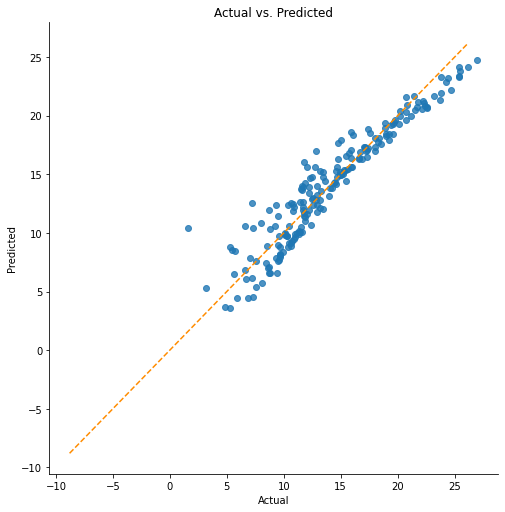

In [ ]:
linear_assumption(lin_reg_dropvar, X_const_dropvar, y)

[Text(0, 0.5, 'Residuals'), Text(0.5, 0, 'Predicted')]

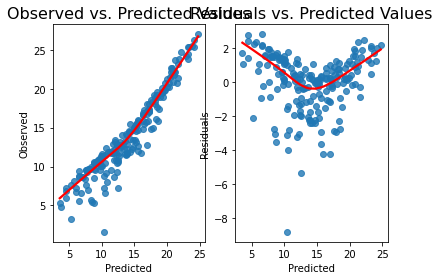

In [ ]:
fitted_vals = lin_reg_dropvar.predict()
resids = lin_reg_dropvar.resid

fig, ax = plt.subplots(1,2)
    
sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
ax[0].set(xlabel='Predicted', ylabel='Observed')

sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
ax[1].set(xlabel='Predicted', ylabel='Residuals')

**Normality of the Error Terms**

In [ ]:
def normal_errors_assumption(model, features, label, p_value_thresh=0.05):
    """
    Normality: Assumes that the error terms are normally distributed. If they are not,
    nonlinear transformations of variables may solve this.
               
    This assumption being violated primarily causes issues with the confidence intervals
    """
    from statsmodels.stats.diagnostic import normal_ad
    print('Assumption: The error terms are normally distributed', '\n')
    
    # Calculating residuals for the Anderson-Darling test
    df_results = calculate_residuals(model, features, label)
    
    print('Using the Anderson-Darling test for normal distribution')

    # Performing the test on the residuals
    p_value = normal_ad(df_results['Residuals'])[1]
    print('p-value from the test - below 0.05 generally means non-normal:', p_value)
    
    # Reporting the normality of the residuals
    if p_value < p_value_thresh:
        print('Residuals are not normally distributed')
    else:
        print('Residuals are normally distributed')
    
    # Plotting the residuals distribution
    plt.subplots(figsize=(12, 6))
    plt.title('Distribution of Residuals')
    sns.distplot(df_results['Residuals'])
    plt.show()
    
    print()
    if p_value > p_value_thresh:
        print('Assumption satisfied')
    else:
        print('Assumption not satisfied')
        print()
        print('Confidence intervals will likely be affected')
        print('Try performing nonlinear transformations on variables')

Assumption: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 2.957935616737092e-09
Residuals are not normally distributed


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


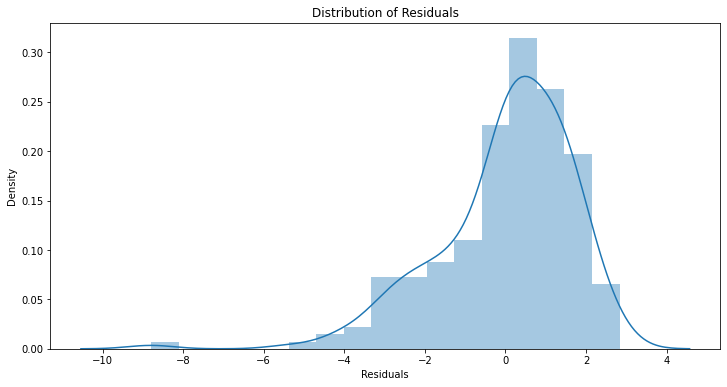


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables


In [ ]:
normal_errors_assumption(lin_reg_dropvar, X_const_dropvar, y)

**No Multicollinearity among Predictors**

We can detect multicollinearity using the variance inflation factor (VIF). 

Without going into too many details, the interpretation of VIF is as follows: the square root of a given variable’s VIF shows how much larger the standard error is, compared with what it would be if that predictor were uncorrelated with the other features in the model. If no features are correlated, then all values for VIF will be 1.

To deal with multicollinearity we should iteratively remove features with high values of VIF. 

A rule of thumb for removal could be VIF larger than 10 (5 is also common).

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_const_dropvar.values, i) for i in range(X_const_dropvar.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=x_annualdropped.columns).T
    

,youtube,92.7FM
vif,1.003013,1.003013


**No Autocorrelation of the Error Terms**

In [ ]:
def autocorrelation_assumption(model, features, label):
    """
    Autocorrelation: Assumes that there is no autocorrelation in the residuals. If there is
                     autocorrelation, then there is a pattern that is not explained due to
                     the current value being dependent on the previous value.
                     This may be resolved by adding a lag variable of either the dependent
                     variable or some of the predictors.
    """
    from statsmodels.stats.stattools import durbin_watson
    print('Assumption: No Autocorrelation', '\n')
    
    # Calculating residuals for the Durbin Watson-tests
    df_results = calculate_residuals(model, features, label)

    print('\nPerforming Durbin-Watson Test')
    print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
    print('0 to 2< is positive autocorrelation')
    print('>2 to 4 is negative autocorrelation')
    print('-------------------------------------')
    durbinWatson = durbin_watson(df_results['Residuals'])
    print('Durbin-Watson:', durbinWatson)
    if durbinWatson < 1.5:
        print('Signs of positive autocorrelation', '\n')
        print('Assumption not satisfied')
    elif durbinWatson > 2.5:
        print('Signs of negative autocorrelation', '\n')
        print('Assumption not satisfied')
    else:
        print('Little to no autocorrelation', '\n')
        print('Assumption satisfied')

In [ ]:
autocorrelation_assumption(lin_reg_dropvar, X_const_dropvar, y)

Assumption: No Autocorrelation 


Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 2.0807806010045318
Little to no autocorrelation 

Assumption satisfied


**Homoscedasticity**

In [ ]:
def homoscedasticity_assumption(model, features, label):
    """
    Homoscedasticity: Assumes that the errors exhibit constant variance
    """
    print('Assumption: Homoscedasticity of Error Terms', '\n')
    
    print('Residuals should have relative constant variance')
        
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)

    # Plotting the residuals
    plt.subplots(figsize=(12, 6))
    ax = plt.subplot(111)  # To remove spines
    plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
    plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
    ax.spines['right'].set_visible(False)  # Removing the right spine
    ax.spines['top'].set_visible(False)  # Removing the top spine
    plt.title('Residuals')
    plt.show()  

Assumption: Homoscedasticity of Error Terms 

Residuals should have relative constant variance


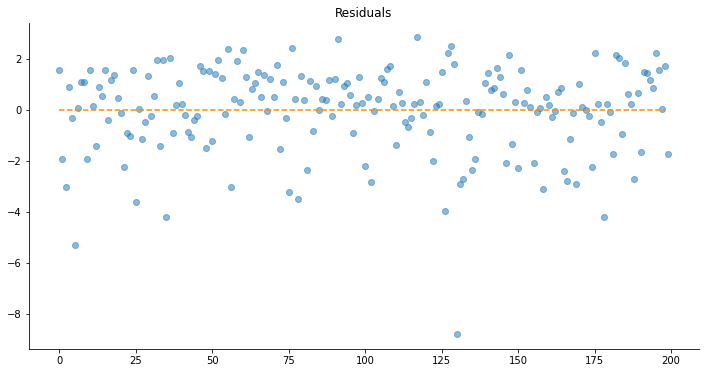

In [ ]:
homoscedasticity_assumption(lin_reg_dropvar, X_const_dropvar, y)

**Train Test Split**

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_const_dropvar, y, test_size=0.4)

In [21]:
len(X_train)

120

In [22]:
len(X_test)

80

In [35]:
X_test.head()

,const,youtube,92.7FM
21,1.0,237.4,5.1
137,1.0,273.7,28.9
89,1.0,109.8,47.8
48,1.0,227.2,15.8
16,1.0,67.8,36.6


Create test dataframe from X_test and y_test

In [36]:
df_test = X_test.copy()
df_test['sales'] = y_test
df_test.head()

,const,youtube,92.7FM,sales
21,1.0,237.4,5.1,12.5
137,1.0,273.7,28.9,20.8
89,1.0,109.8,47.8,16.7
48,1.0,227.2,15.8,14.8
16,1.0,67.8,36.6,12.5


Training the OLS Model on Train data

In [52]:
from statsmodels.regression import linear_model
X_train_const = sm.add_constant(X_train)
sm_ols = linear_model.OLS(y_train, X_train_const) 
sm_model = sm_ols.fit()


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Predicting on Test data

In [53]:
y_predicted = sm_model.predict(X_test)
residuals_adv = y_test - y_predicted

Residuals calculation and insertion in test dataframe

In [54]:
df_test['residuals'] = residuals_adv
df_test['predicted_sales'] = y_predicted

In [55]:
df_test.head()

,const,youtube,92.7FM,sales,residuals,predicted_sales
21,1.0,237.4,5.1,12.5,-2.025416,14.525416
137,1.0,273.7,28.9,20.8,-0.076914,20.876914
89,1.0,109.8,47.8,16.7,-0.557135,17.257135
48,1.0,227.2,15.8,14.8,-1.388782,16.188782
16,1.0,67.8,36.6,12.5,-0.648074,13.148074


RMSE of Test data

In [56]:
rmse_test = np.sqrt(mean_squared_error(y_test, y_predicted))
rmse_test

1.8767894011892752

**Checking errors on Train Data and compare with test data to understand overfitting and underfitting**

In [57]:
df_train = X_train.copy()
df_train['sales'] = y_train
df_train.head()

,const,youtube,92.7FM,sales
12,1.0,23.8,35.1,9.2
15,1.0,195.4,47.7,22.4
3,1.0,151.5,41.3,18.5
187,1.0,191.1,28.7,17.3
153,1.0,171.3,39.7,19.0


In [58]:
y_pred_train = sm_model.predict(X_train)
residuals_train = y_train - y_pred_train

In [59]:
df_train['residuals'] = residuals_train
df_train['predicted_sales'] = y_pred_train

In [60]:
df_train.head()

,const,youtube,92.7FM,sales,residuals,predicted_sales
12,1.0,23.8,35.1,9.2,-1.672685,10.872685
15,1.0,195.4,47.7,22.4,1.314726,21.085274
3,1.0,151.5,41.3,18.5,0.657324,17.842676
187,1.0,191.1,28.7,17.3,0.175858,17.124142
153,1.0,171.3,39.7,19.0,0.584548,18.415452


In [61]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_train

1.529916948358939

Let us also plot histograms of error of train and test data

Histogram of Test errors

(array([ 1.,  0.,  1.,  0.,  1.,  9., 12., 25., 22.,  9.]),
 array([-9.12665418, -7.91751641, -6.70837864, -5.49924088, -4.29010311,
        -3.08096534, -1.87182757, -0.6626898 ,  0.54644797,  1.75558573,
         2.9647235 ]),
 <a list of 10 Patch objects>)

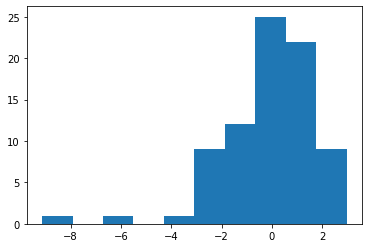

In [62]:
counts, bins = np.histogram(residuals_adv)
plt.hist(bins[:-1], bins, weights=counts)

Histogram of Train errors

(array([ 4.,  5.,  3.,  8., 10., 14., 34., 23., 15.,  4.]),
 array([-4.30700494e+00, -3.58883866e+00, -2.87067238e+00, -2.15250610e+00,
        -1.43433982e+00, -7.16173542e-01,  1.99273773e-03,  7.20159017e-01,
         1.43832530e+00,  2.15649158e+00,  2.87465785e+00]),
 <a list of 10 Patch objects>)

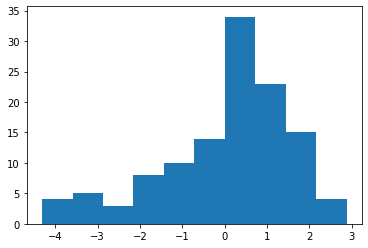

In [63]:
counts, bins = np.histogram(residuals_train)
plt.hist(bins[:-1], bins, weights=counts)

For this dataset, we can observe the range of errors for test data is slightly larger than range of errors for train data.

So,liberally we can conclude that there is overfitting of model

**Lets formalize overfitting and underfitting conceptually**

*Note: Diagrams and plots in the following cells are not related to the dataset we are working. But,depiction is for conceptual understanding

Underfitting is a situation when your model is too simple for your data. 

More formally, your hypothesis about data distribution is wrong and too simple — for example, your data is quadratic and your model is linear. This situation is also called high bias. This means that your algorithm can do accurate predictions, but the initial assumption about the data is incorrect.

![An image](https://miro.medium.com/max/612/1*2lH2YCBteTcsNfb2M7wU-A.jpeg)

overfitting is a situation when your model is too complex for your data. 

More formally, your hypothesis about data distribution is wrong and too complex — for example, your data is linear and your model is high-degree polynomial. This situation is also called high variance. This means that your algorithm can’t do accurate predictions — changing the input data only a little, the model output changes very much.

![An image](https://miro.medium.com/max/612/1*4c9jedXxoc6Y-urqh4k-SQ.jpeg)

These are two extremes of the same problem and the optimal solution always lies somewhere in the middle.

![An image](https://miro.medium.com/max/612/1*RgzD6hDLY2esO5EGV4ZpyQ.jpeg)

**Bias-Variance Trade off**

low bias, low variance — is a good result, just right.

low bias, high variance — overfitting — the algorithm outputs very different predictions for similar data.

high bias, low variance — underfitting — the algorithm outputs similar predictions for similar data, but predictions are wrong (algorithm “miss”).

high bias, high variance — very bad algorithm. You will most likely never see this.

![An image](https://miro.medium.com/max/460/1*idzNMBgNIPLF_njyOg4VUw.jpeg)

All these cases can be placed on the same plot. It is a bit less clear than the previous one but more compact.

![An image](https://miro.medium.com/max/453/1*Rvbk-AyHq0YCfWzeawgatQ.jpeg)

**How to Detect Underfitting and Overfitting**

![An image](https://miro.medium.com/max/700/1*4f2R4EpXYUUY8rfKH888RQ.png)

Underfitting means that your model makes accurate, but initially incorrect predictions. In this case, train error is large and val/test error is large too.

Overfitting means that your model makes not accurate predictions. In this case, train error is very small and val/test error is large.

![An image](https://miro.medium.com/max/700/1*EqjPJebq38w9pBdXH54KGw.png)

**underfitting occurs when your model is too simple for your data.**

**overfitting occurs when your model is too complex for your data.**

**To fix underfitting, you should complicate the model.**

**To fix overfitting, you should simplify the model.**

Regularization is the key to handle this for regression



**Regularization Techniques:**

Important step to improve the model prediction and reduce errors. This is also called the Shrinkage method which we use to add the penalty term to control the complex model and to avoid overfitting by reducing the variance.

![An image](https://editor.analyticsvidhya.com/uploads/11971LR-var.png)

**1. Ridge Regression (L2 Regularization):**

Basic idea is to minimize the sum of squared errors and sum of the squared coefficients (β).

In the background,
the coefficients (β) with a large magnitude will generate the graph peak and
deep slope, to suppress this we’re using the lambda (λ) use to be called a
Penalty Factor and help us to get a smooth surface instead of an irregular-graph. 

Ridge Regression is used to push the coefficients(β) value nearing zero in terms of magnitude. 

This is L2 regularization, since its adding a penalty-equivalent to the Square-of-the Magnitude of coefficients.

**Ridge Regression = Loss function + Regularized term**

![An image](https://editor.analyticsvidhya.com/uploads/90026RR.png)

**2. Lasso Regression (L1 Regularization):**

This is very similar to Ridge Regression, with little difference in Penalty Factor that coefficient is magnitude instead of squared. In which there are possibilities of many coefficients becoming zero, so that corresponding attribute/features become zero and dropped from the list, this ultimately reduces the dimensions and supports for dimensionality reduction. So which deciding that those attributes/features are not suitable as predators for predicting target value. 

This is L1 regularization, because of adding the Absolute-Value as penalty-equivalent to the magnitude of coefficients.

**Lasso Regression = Loss function + Regularized term**

![An image](https://editor.analyticsvidhya.com/uploads/20996LRR.png)

**3. Characteristics of Lambda:**

**λ = 0:** 
No impact on coefficients(β) and model would be Overfit. Not suitable
for Production

**λ => Minimal**
Generalised model and acceptable accuracy and eligible for Test and
Train. Fit for Production

**λ =>High**
Very high impact on coefficients (β) and leading to underfit. Ultimately not fit for Production.

Ridge never make coefficients into zero, Lasso will do. So, you can use the Lasso for feature selection.

Impact of Regularization

![An image](https://editor.analyticsvidhya.com/uploads/83837impact%20of%20req.png)

**Pictorial representation of Regularization Techniques**

![An image](https://editor.analyticsvidhya.com/uploads/85659L1-L2-L1L2.png)

**Mathematical approach for L1 and L2**

y=β0+ β1 x1+ β2 x2+………………+ βn xn —————–1

yi= β0+ Σ βi xi —————–2

Σ yi– β0– Σ βi xi

Cost/Loss function:  Σ{ yi– β0– Σ βi xij}2—————–3

Regularized term: λΣ βi2—————-4

Ridge Regression = Loss function + Regularized term—————–5

Put 3 and 4 in 5

Ridge Regression = Σ { yi– β0– Σ βi xij}2+ λ Σ βi2

Lasso Regression = Σ { yi– β0– Σ βi xij}2+ λ Σ |βi|

x ==> independent variables

y ==> target variables

β ==> coefficients

λ ==> penalty-factor

How coefficients(β) are calculated internally

![An image](https://editor.analyticsvidhya.com/uploads/82404coefficients%20calc.png)

**Ridge Regression code (L2 Regularization)**

In [65]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [0.         0.04495292 0.19830483]


In [68]:
y_pred_ridge = ridge.predict(X_test)
resid_ridge = y_test - y_pred_ridge

In [70]:
rmse_ridge_test = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
rmse_ridge_test

1.8767829558335247

In [71]:
y_ridge_train = ridge.predict(X_train)
resid_ridge_train = y_train - y_ridge_train

In [72]:
rmse_ridge_train = np.sqrt(mean_squared_error(y_train, y_ridge_train))
rmse_ridge_train

1.529916948717913

In this case, there is no much improvement of model using ridge as deviation of errors is very less

**Lasso regression code**

In [73]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [0.         0.04494373 0.19786346]


In [74]:
y_pred_lasso = lasso.predict(X_test)
resid_lasso = y_test - y_pred_lasso

In [75]:
rmse_lasso_test = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
rmse_lasso_test

1.875586909347028

In [76]:
y_lasso_train = lasso.predict(X_train)
resid_lasso_train = y_train - y_lasso_train

In [77]:
rmse_lasso_train = np.sqrt(mean_squared_error(y_train, y_lasso_train))
rmse_lasso_train

1.529931744791119